# Notebook for generating plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Optimal costs and routes

In [97]:
optimas = {
    'ch130': 6110,
    'ch150': 6528,
    'eil101': 629,
    'kroA100': 21282,
    'kroC100': 20749,
    'kroD100': 21294,
    'lin105': 14379,
    'pr76': 108159,
}

optimal_solutions = {
    'ch130': [1, 41, 39, 117, 112, 115, 28, 62, 105, 128, 16, 45, 5, 11, 76, 109, 61, 129, 124, 64, 69, 86, 88, 26, 7, 97, 70, 107, 127, 104, 43, 34, 17, 31, 
              27, 19, 100, 15, 29, 24, 116, 95, 79, 87, 12, 81, 103, 77, 94, 89, 110, 98, 68, 63, 48, 25, 113, 32, 36, 84, 119, 111, 123, 101, 82, 57, 9, 56, 
              65, 52, 75, 74, 99, 73, 92, 38, 106, 53, 120, 58, 49, 72, 91, 6, 102, 10, 14, 67, 13, 96, 122, 55, 60, 51, 42, 44, 93, 37, 22, 47, 40, 23, 33, 21, 
              126, 121, 78, 66, 85, 125, 90, 59, 30, 83, 3, 114, 108, 8, 18, 46, 80, 118, 20, 4, 35, 54, 2, 50, 130, 71],
    'ch150': [1, 98, 103, 82, 95, 107, 5, 100, 143, 97, 146, 26, 75, 18, 142, 85, 65, 132, 137, 50, 55, 58, 141, 83, 56, 90, 46, 92, 54, 138, 134, 131, 32, 23, 
              38, 67, 43, 109, 51, 20, 25, 110, 81, 29, 86, 135, 70, 108, 102, 114, 99, 19, 2, 37, 6, 28, 9, 42, 120, 47, 139, 40, 53, 118, 24, 12, 116, 101, 41, 
              57, 39, 127, 69, 36, 61, 11, 148, 130, 17, 66, 60, 140, 117, 129, 27, 31, 123, 74, 13, 106, 91, 119, 68, 128, 45, 71, 44, 64, 112, 136, 145, 144, 49, 
              147, 72, 80, 14, 122, 77, 133, 15, 78, 21, 150, 115, 4, 104, 22, 125, 149, 62, 3, 113, 10, 94, 88, 121, 79, 59, 16, 111, 105, 33, 126, 52, 93, 124, 35, 96, 89, 8, 7, 84, 30, 63, 48, 73, 76, 34, 87],
    'eil101': [1, 69, 27, 101, 53, 28, 26, 12, 80, 68, 29, 24, 54, 55, 25, 4, 39, 67, 23, 56, 75, 41, 22, 74, 72, 73, 21, 40, 58, 13, 94, 95, 97, 87, 2, 57, 15, 
               43, 42, 14, 44, 38, 86, 16, 61, 85, 91, 100, 98, 37, 92, 59, 93, 99, 96, 6, 89, 52, 18, 83, 60, 5, 84, 17, 45, 8, 46, 47, 36, 49, 64, 63, 90, 32, 
               10, 62, 11, 19, 48, 82, 7, 88, 31, 70, 30, 20, 66, 71, 65, 35, 34, 78, 81, 9, 51, 33, 79, 3, 77, 76, 50],
    'kroA100': [1, 47, 93, 28, 67, 58, 61, 51, 87, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82, 95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 41, 
                71, 14, 3, 43, 46, 29, 34, 83, 55, 7, 9, 57, 20, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 
                38, 24, 18, 79, 53, 88, 16, 94, 22, 70, 66, 26, 65, 4, 97, 56, 80, 31, 89, 42, 8, 92, 75, 19, 90, 49, 6, 63],
    'kroC100': [1, 85, 27, 15, 13, 79, 64, 20, 42, 55, 67, 47, 31, 65, 80, 77, 30, 68, 35, 2, 54, 6, 75, 22, 8, 17, 25, 90, 34, 58, 98, 88, 28, 39, 38, 71, 56, 
                43, 5, 86, 72, 83, 62, 50, 95, 94, 91, 76, 70, 23, 21, 89, 41, 59, 73, 3, 69, 60, 4, 93, 99, 19, 92, 10, 14, 36, 57, 74, 100, 33, 45, 81, 97, 96, 
                87, 52, 11, 84, 48, 66, 44, 63, 51, 16, 37, 9, 78, 82, 7, 26, 61, 32, 24, 46, 29, 18, 49, 12, 40, 53],
    'kroD100': [1, 50, 34, 81, 38, 66, 8, 52, 46, 23, 42, 89, 11, 90, 17, 94, 32, 97, 98, 49, 70, 22, 58, 29, 36, 67, 75, 7, 74, 61, 76, 80, 72, 57, 31, 78, 99, 
                45, 33, 68, 14, 65, 86, 96, 16, 63, 54, 91, 77, 43, 64, 85, 59, 3, 83, 40, 6, 18, 82, 25, 20, 9, 10, 21, 47, 12, 28, 56, 95, 26, 87, 55, 92, 48, 
                2, 100, 30, 35, 51, 19, 37, 62, 5, 53, 60, 44, 93, 4, 71, 39, 73, 15, 69, 84, 41, 24, 27, 88, 79, 13],
    'lin105': [1, 2, 6, 7, 10, 11, 15, 103, 21, 22, 29, 30, 31, 32, 33, 28, 23, 20, 12, 19, 24, 27, 16, 17, 18, 25, 26, 36, 37, 42, 41, 43, 46, 52, 53, 58, 57, 
               54, 51, 47, 44, 104, 40, 49, 45, 48, 50, 55, 56, 59, 105, 62, 63, 70, 69, 74, 75, 81, 73, 76, 80, 86, 79, 77, 72, 64, 67, 68, 71, 78, 82, 83, 84, 
               85, 91, 92, 96, 97, 101, 102, 93, 89, 90, 98, 99, 100, 95, 94, 88, 87, 66, 65, 61, 60, 39, 38, 35, 34, 14, 13, 4, 5, 9, 8, 3],
    'pr76': [1, 76, 75, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 74, 15, 16, 17, 18, 37, 36, 38, 39, 40, 34, 35, 33, 32, 29, 30, 31, 19, 20, 26, 27, 28, 
             43, 42, 54, 53, 52, 55, 56, 57, 58, 59, 60, 41, 61, 62, 63, 64, 73, 72, 71, 65, 66, 51, 49, 50, 67, 70, 68, 69, 47, 48, 44, 45, 46, 24, 25, 21, 22, 23],
}

In [3]:
# function to read the data from the file
def read_data(filename):
    # if odd line number, then it is a solution
    # if even line number, then it is a cost
    # skip the last line
    # on new line, append to the list
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        lines = lines
        solutions = []
        costs = []
        for i in range(len(lines)):
            if i % 2 == 0:
                #solutions.append(lines[i][:-1])
                solutions.append(list(map(int,lines[i][:-2].split(' '))))
            else:
                costs.append(float(lines[i][:-1]))
    return solutions, costs


#### Read solutions and costs

In [4]:
# ch130
random_ch130, random_ch130_costs = read_data('solution_random_ch130.txt')
random_walk_ch130, random_walk_ch130_costs = read_data('solution_random_walk_ch130.txt')
nn_ch130, nn_ch130_costs = read_data('solution_nn_ch130.txt')
greedy_ch130, greedy_ch130_costs = read_data('solution_greedy_ch130.txt')
steepest_ch130, steepest_ch130_costs = read_data('solution_steepest_ch130.txt')

In [5]:
# ch150
random_ch150, random_ch150_costs = read_data('solution_random_ch150.txt')
random_walk_ch150, random_walk_ch150_costs = read_data('solution_random_walk_ch150.txt')
nn_ch150, nn_ch150_costs = read_data('solution_nn_ch150.txt')
greedy_ch150, greedy_ch150_costs = read_data('solution_greedy_ch150.txt')
steepest_ch150, steepest_ch150_costs = read_data('solution_steepest_ch150.txt')

In [6]:
# eil101
random_eil101, random_eil101_costs = read_data('solution_random_eil101.txt')
random_walk_eil101, random_walk_eil101_costs = read_data('solution_random_walk_eil101.txt')
nn_eil101, nn_eil101_costs = read_data('solution_nn_eil101.txt')
greedy_eil101, greedy_eil101_costs = read_data('solution_greedy_eil101.txt')
steepest_eil101, steepest_eil101_costs = read_data('solution_steepest_eil101.txt')

In [7]:
# kroA100
random_kroA100, random_kroA100_costs = read_data('solution_random_kroA100.txt')
random_walk_kroA100, random_walk_kroA100_costs = read_data('solution_random_walk_kroA100.txt')
nn_kroA100, nn_kroA100_costs = read_data('solution_nn_kroA100.txt')
greedy_kroA100, greedy_kroA100_costs = read_data('solution_greedy_kroA100.txt')
steepest_kroA100, steepest_kroA100_costs = read_data('solution_steepest_kroA100.txt')

In [8]:
# kroC100
random_kroC100, random_kroC100_costs = read_data('solution_random_kroC100.txt')
random_walk_kroC100, random_walk_kroC100_costs = read_data('solution_random_walk_kroC100.txt')
nn_kroC100, nn_kroC100_costs = read_data('solution_nn_kroC100.txt')
greedy_kroC100, greedy_kroC100_costs = read_data('solution_greedy_kroC100.txt')
steepest_kroC100, steepest_kroC100_costs = read_data('solution_steepest_kroC100.txt')

In [9]:
# kroD100
random_kroD100, random_kroD100_costs = read_data('solution_random_kroD100.txt')
random_walk_kroD100, random_walk_kroD100_costs = read_data('solution_random_walk_kroD100.txt')
nn_kroD100, nn_kroD100_costs = read_data('solution_nn_kroD100.txt')
greedy_kroD100, greedy_kroD100_costs = read_data('solution_greedy_kroD100.txt')
steepest_kroD100, steepest_kroD100_costs = read_data('solution_steepest_kroD100.txt')

In [10]:
# lin105
random_lin105, random_lin105_costs = read_data('solution_random_lin105.txt')
random_walk_lin105, random_walk_lin105_costs = read_data('solution_random_walk_lin105.txt')
nn_lin105, nn_lin105_costs = read_data('solution_nn_lin105.txt')
greedy_lin105, greedy_lin105_costs = read_data('solution_greedy_lin105.txt')
steepest_lin105, steepest_lin105_costs = read_data('solution_steepest_lin105.txt')

In [11]:
# pr76
random_pr76, random_pr76_costs = read_data('solution_random_pr76.txt')
random_walk_pr76, random_walk_pr76_costs = read_data('solution_random_walk_pr76.txt')
nn_pr76, nn_pr76_costs = read_data('solution_nn_pr76.txt')
greedy_pr76, greedy_pr76_costs = read_data('solution_greedy_pr76.txt')
steepest_pr76, steepest_pr76_costs = read_data('solution_steepest_pr76.txt')

In [17]:
max(random_ch130_costs)

41071.2

#### Quality

In [94]:
def get_quality(costs, optimas, instance):
    # get the quality of the solution (cost-optimal)/optimal
    # quality = 1 - cost
    quality = []
    for cost in costs:
        quality.append((cost-optimas[instance])/optimas[instance]) 
    return quality

Calculate qualities as (score - optimal_cost)/optimal_cost

In [13]:
# ch130
random_ch130_quality = get_quality(random_ch130_costs, optimas, 'ch130')
random_walk_ch130_quality = get_quality(random_walk_ch130_costs, optimas, 'ch130')
nn_ch130_quality = get_quality(nn_ch130_costs, optimas, 'ch130')
greedy_ch130_quality = get_quality(greedy_ch130_costs, optimas, 'ch130')
steepest_ch130_quality = get_quality(steepest_ch130_costs, optimas, 'ch130')

In [14]:
# ch150
random_ch150_quality = get_quality(random_ch150_costs, optimas, 'ch150')
random_walk_ch150_quality = get_quality(random_walk_ch150_costs, optimas, 'ch150')
nn_ch150_quality = get_quality(nn_ch150_costs, optimas, 'ch150')
greedy_ch150_quality = get_quality(greedy_ch150_costs, optimas, 'ch150')
steepest_ch150_quality = get_quality(steepest_ch150_costs, optimas, 'ch150')

In [15]:
# eil101
random_eil101_quality = get_quality(random_eil101_costs, optimas, 'eil101')
random_walk_eil101_quality = get_quality(random_walk_eil101_costs, optimas, 'eil101')
nn_eil101_quality = get_quality(nn_eil101_costs, optimas, 'eil101')
greedy_eil101_quality = get_quality(greedy_eil101_costs, optimas, 'eil101')
steepest_eil101_quality = get_quality(steepest_eil101_costs, optimas, 'eil101')

In [16]:
# kroA100
random_kroA100_quality = get_quality(random_kroA100_costs, optimas, 'kroA100')
random_walk_kroA100_quality = get_quality(random_walk_kroA100_costs, optimas, 'kroA100')
nn_kroA100_quality = get_quality(nn_kroA100_costs, optimas, 'kroA100')
greedy_kroA100_quality = get_quality(greedy_kroA100_costs, optimas, 'kroA100')
steepest_kroA100_quality = get_quality(steepest_kroA100_costs, optimas, 'kroA100')

In [17]:
# kroC100
random_kroC100_quality = get_quality(random_kroC100_costs, optimas, 'kroC100')
random_walk_kroC100_quality = get_quality(random_walk_kroC100_costs, optimas, 'kroC100')
nn_kroC100_quality = get_quality(nn_kroC100_costs, optimas, 'kroC100')
greedy_kroC100_quality = get_quality(greedy_kroC100_costs, optimas, 'kroC100')
steepest_kroC100_quality = get_quality(steepest_kroC100_costs, optimas, 'kroC100')

In [18]:
# kroD100
random_kroD100_quality = get_quality(random_kroD100_costs, optimas, 'kroD100')
random_walk_kroD100_quality = get_quality(random_walk_kroD100_costs, optimas, 'kroD100')
nn_kroD100_quality = get_quality(nn_kroD100_costs, optimas, 'kroD100')
greedy_kroD100_quality = get_quality(greedy_kroD100_costs, optimas, 'kroD100')
steepest_kroD100_quality = get_quality(steepest_kroD100_costs, optimas, 'kroD100')

In [19]:
# lin105
random_lin105_quality = get_quality(random_lin105_costs, optimas, 'lin105')
random_walk_lin105_quality = get_quality(random_walk_lin105_costs, optimas, 'lin105')
nn_lin105_quality = get_quality(nn_lin105_costs, optimas, 'lin105')
greedy_lin105_quality = get_quality(greedy_lin105_costs, optimas, 'lin105')
steepest_lin105_quality = get_quality(steepest_lin105_costs, optimas, 'lin105')

In [20]:
# pr76
random_pr76_quality = get_quality(random_pr76_costs, optimas, 'pr76')
random_walk_pr76_quality = get_quality(random_walk_pr76_costs, optimas, 'pr76')
nn_pr76_quality = get_quality(nn_pr76_costs, optimas, 'pr76')
greedy_pr76_quality = get_quality(greedy_pr76_costs, optimas, 'pr76')
steepest_pr76_quality = get_quality(steepest_pr76_costs, optimas, 'pr76')

In [21]:
def create_boxplot_instance(data, instance, xlabel='Algorithms', ylabel='Quality', title="Quality of solutions for"):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(title+" "+instance)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.boxplot(data, labels=['random', 'rw', 'nn', 'greedy', 'steepest'])
    plt.show()

In [22]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
def create_boxplot_algorithm(data, algorithm, xlabel='Instance', ylabel='Quality', title="Quality of solutions for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    # plt.title(title+" "+algorithm)
    # plt.xlabel(xlabel)
    # plt.ylabel(ylabel)
    # calculate min, max, avg, std for each instance
    stats = {}
    for name, values in zip(labels, data):
        stats[name] = {
            'min': np.min(values),
            'max': np.max(values),
            'avg': np.mean(values),
            'std': np.std(values),
        }

    # plot results
    names = labels
    min_values = [stats[name]['min'] for name in names]
    max_values = [stats[name]['max'] for name in names]
    avg_values = [stats[name]['avg'] for name in names]
    std_values = [stats[name]['std'] for name in names]

    fig, ax = plt.subplots()
    # set axis label size
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # set axis tick size
    ax.tick_params(axis='both', which='major', labelsize=12)
    # set min and max values for y axis
    ax.set_ylim([0, 0.5])
    # set grid
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    fig.suptitle(title+" "+algorithm, fontsize=16)
    fig.axes[0].set_xlabel(xlabel)
    fig.axes[0].set_ylabel(ylabel)
    # plot min and max values
    ax.plot(names, min_values, 'o', label='min')
    ax.plot(names, max_values, 'o', label='max')
    # plot avg and std values in a form of error bars
    ax.errorbar(names, avg_values, yerr=std_values, capsize=4, fmt='o', label='avg +- std', elinewidth=2, capthick=1.5)
    ax.legend()
    fig.savefig(algorithm+'_qualities.pdf', bbox_inches='tight')
    plt.xticks(rotation=90)
    plt.show()

Get qualities from every instance for each algorithm

In [23]:
random_qualities = [random_ch130_quality, random_ch150_quality, random_eil101_quality, random_kroA100_quality, random_kroC100_quality, random_kroD100_quality, random_lin105_quality, random_pr76_quality]
random_walk_qualities = [random_walk_ch130_quality, random_walk_ch150_quality, random_walk_eil101_quality, random_walk_kroA100_quality, random_walk_kroC100_quality, random_walk_kroD100_quality, random_walk_lin105_quality, random_walk_pr76_quality]
nn_qualities = [nn_ch130_quality, nn_ch150_quality, nn_eil101_quality, nn_kroA100_quality, nn_kroC100_quality, nn_kroD100_quality, nn_lin105_quality, nn_pr76_quality]
greedy_qualities = [greedy_ch130_quality, greedy_ch150_quality, greedy_eil101_quality, greedy_kroA100_quality, greedy_kroC100_quality, greedy_kroD100_quality, greedy_lin105_quality, greedy_pr76_quality]
steepest_qualities = [steepest_ch130_quality, steepest_ch150_quality, steepest_eil101_quality, steepest_kroA100_quality, steepest_kroC100_quality, steepest_kroD100_quality, steepest_lin105_quality, steepest_pr76_quality]

In [31]:
for it in steepest_qualities:
    print(round(min(it), 3), round(np.mean(it), 3))

0.049 0.084
0.053 0.093
0.079 0.099
0.022 0.068
0.035 0.071
0.046 0.08
0.031 0.069
0.006 0.046


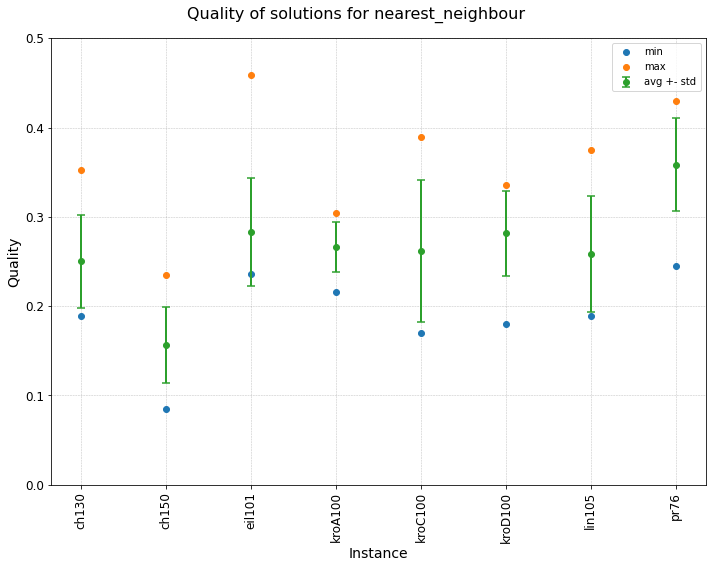

In [43]:
#create_boxplot_algorithm(random_qualities, 'random')
#create_boxplot_algorithm(random_walk_qualities, 'random_walk')
create_boxplot_algorithm(nn_qualities, 'nearest_neighbour')
#create_boxplot_algorithm(greedy_qualities, 'greedy')
#create_boxplot_algorithm(steepest_qualities, 'steepest')

#### Running time

In [44]:
def read_running_times(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        return [float(line.strip()) for line in lines]
    

In [45]:
nn_times_ch130 = read_running_times('nn_times_ch130.txt')
nn_times_ch150 = read_running_times('nn_times_ch150.txt')
nn_times_eil101 = read_running_times('nn_times_eil101.txt')
nn_times_kroA100 = read_running_times('nn_times_kroA100.txt')
nn_times_kroC100 = read_running_times('nn_times_kroC100.txt')
nn_times_kroD100 = read_running_times('nn_times_kroD100.txt')
nn_times_lin105 = read_running_times('nn_times_lin105.txt')
nn_times_pr76 = read_running_times('nn_times_pr76.txt')

greedy_times_ch130 = read_running_times('greedy_times_ch130.txt')
greedy_times_ch150 = read_running_times('greedy_times_ch150.txt')
greedy_times_eil101 = read_running_times('greedy_times_eil101.txt')
greedy_times_kroA100 = read_running_times('greedy_times_kroA100.txt')
greedy_times_kroC100 = read_running_times('greedy_times_kroC100.txt')
greedy_times_kroD100 = read_running_times('greedy_times_kroD100.txt')
greedy_times_lin105 = read_running_times('greedy_times_lin105.txt')
greedy_times_pr76 = read_running_times('greedy_times_pr76.txt')

steepest_times_ch130 = read_running_times('steepest_times_ch130.txt')
steepest_times_ch150 = read_running_times('steepest_times_ch150.txt')
steepest_times_eil101 = read_running_times('steepest_times_eil101.txt')
steepest_times_kroA100 = read_running_times('steepest_times_kroA100.txt')
steepest_times_kroC100 = read_running_times('steepest_times_kroC100.txt')
steepest_times_kroD100 = read_running_times('steepest_times_kroD100.txt')
steepest_times_lin105 = read_running_times('steepest_times_lin105.txt')
steepest_times_pr76 = read_running_times('steepest_times_pr76.txt')

In [51]:
def create_boxplot_running_time(data, algorithm, xlabel='Instance', ylabel='Running time [ms]', title="Running time for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    stats = {}
    for name, values in zip(labels, data):
        values = np.array(values)/1000000
        stats[name] = {
            'min': np.min(values),
            'max': np.max(values),
            'avg': np.mean(values),
            'std': np.std(values),
        }

    # plot results
    names = labels
    min_values = [stats[name]['min'] for name in names]
    max_values = [stats[name]['max'] for name in names]
    avg_values = [stats[name]['avg'] for name in names]
    std_values = [stats[name]['std'] for name in names]

    fig, ax = plt.subplots()
    # set axis label size
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # set axis tick size
    ax.tick_params(axis='both', which='major', labelsize=12)
    # set min and max values on y axis
    ax.set_ylim([0, 0.2])
    # set grid
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    fig.suptitle(title+" "+algorithm, fontsize=16)
    fig.suptitle(title+" "+algorithm)
    fig.axes[0].set_xlabel(xlabel)
    fig.axes[0].set_ylabel(ylabel)
    ax.ticklabel_format(style='plain', axis='y')
    # plot min and max values
    ax.plot(names, min_values, 'o', label='min')
    ax.plot(names, max_values, 'o', label='max')
    # plot avg and std values in a form of error bars
    ax.errorbar(names, avg_values, yerr=std_values, capsize=4, fmt='o', label='avg +- std', elinewidth=2, capthick=1.5)
    ax.legend()
    fig.savefig(algorithm+'_running_times.pdf', bbox_inches='tight')
    plt.xticks(rotation=90)
    plt.show()


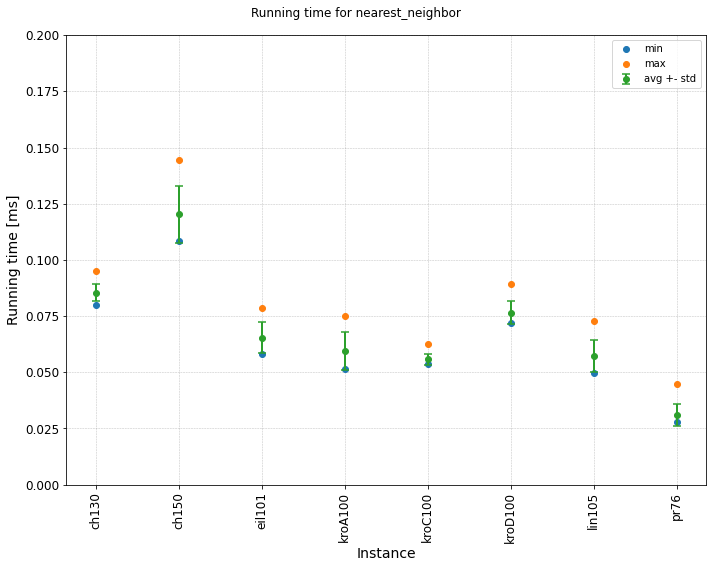

In [52]:
nn_running_times = [nn_times_ch130, nn_times_ch150, nn_times_eil101, nn_times_kroA100, nn_times_kroC100, nn_times_kroD100, nn_times_lin105, nn_times_pr76]
greedy_running_times = [greedy_times_ch130, greedy_times_ch150, greedy_times_eil101, greedy_times_kroA100, greedy_times_kroC100, greedy_times_kroD100, greedy_times_lin105, greedy_times_pr76]
steepest_running_times = [steepest_times_ch130, steepest_times_ch150, steepest_times_eil101, steepest_times_kroA100, steepest_times_kroC100, steepest_times_kroD100, steepest_times_lin105, steepest_times_pr76]

create_boxplot_running_time(nn_running_times, 'nearest_neighbor')
#create_boxplot_running_time(greedy_running_times, 'greedy')
#create_boxplot_running_time(steepest_running_times, 'steepest')

#### Efficiency

In [133]:
def read_efficiencies(filename):
    with open(filename, 'r') as f:
        return [float(line) for line in f]

In [140]:
random_eil101_efficiency = sorted(read_efficiencies('random_minute_eil101.txt'))[2:]
random_walk_eil101_efficiency = read_efficiencies('random_walk_minute_eil101.txt')
nn_eil101_efficiency = read_efficiencies('nearest_neighbor_minute_eil101.txt')
greedy_eil101_efficiency = read_efficiencies('greedy_minute_eil101.txt')
steepest_eil101_efficiency = read_efficiencies('steepest_minute_eil101.txt')

random_pr76_efficiency = read_efficiencies('random_minute_pr76.txt')
random_walk_pr76_efficiency = read_efficiencies('random_walk_minute_pr76.txt')
nn_pr76_efficiency = read_efficiencies('nearest_neighbor_minute_pr76.txt')
#greedy_pr76_efficiency = read_efficiencies('greedy_minute_pr76.txt')
steepest_pr76_efficiency = read_efficiencies('steepest_minute_pr76.txt')

# shuffle data
random_eil101_efficiency = np.random.permutation(random_eil101_efficiency)
random_walk_eil101_efficiency = np.random.permutation(random_walk_eil101_efficiency)
nn_eil101_efficiency = np.random.permutation(nn_eil101_efficiency)
greedy_eil101_efficiency = np.random.permutation(greedy_eil101_efficiency)
steepest_eil101_efficiency = np.random.permutation(steepest_eil101_efficiency)

random_pr76_efficiency = np.random.permutation(random_pr76_efficiency)
random_walk_pr76_efficiency = np.random.permutation(random_walk_pr76_efficiency)
nn_pr76_efficiency = np.random.permutation(nn_pr76_efficiency)
#greedy_pr76_efficiency = np.random.permutation(greedy_pr76_efficiency)
steepest_pr76_efficiency = np.random.permutation(steepest_pr76_efficiency)

In [141]:
random_eil101_efficiency_min = get_quality([min(random_eil101_efficiency[:len(random_eil101_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'eil101')
random_walk_eil101_efficiency_min = get_quality([min(random_walk_eil101_efficiency[:len(random_walk_eil101_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'eil101')
nn_eil101_efficiency_min = get_quality([min(nn_eil101_efficiency[:len(nn_eil101_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'eil101')
greedy_eil101_efficiency_min = get_quality([min(greedy_eil101_efficiency[:len(greedy_eil101_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'eil101')
steepest_eil101_efficiency_min = get_quality([min(steepest_eil101_efficiency[:len(steepest_eil101_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'eil101')



random_pr76_efficiency_min = get_quality([min(random_pr76_efficiency[:len(random_pr76_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'pr76')
random_walk_pr76_efficiency_min = get_quality([min(random_walk_pr76_efficiency[:len(random_walk_pr76_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'pr76')
nn_pr76_efficiency_min = get_quality([min(nn_pr76_efficiency[:len(nn_pr76_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'pr76')
#greedy_pr76_efficiency_min = get_quality([min(greedy_pr76_efficiency[:len(greedy_pr76_efficiency)//i]) for i in range(1000, 1, -1)], optimas, 'pr76')
steepest_pr76_efficiency_min = get_quality([min(steepest_pr76_efficiency[:len(steepest_pr76_efficiency)//i]) for i in range(100, 1, -1)], optimas, 'pr76')


In [148]:
def create_plot_efficiency(data, algorithm, xlabel='Tenth of a second', ylabel='Best quality found so far', title="Efficiency for"):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    # title size
    plt.rcParams['axes.titlesize'] = 16
    plt.title(title+" "+algorithm)
    # labels size
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set y-axis limits
    plt.ylim(0.04, 0.075)
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    plt.xticks(np.arange(0, 1000, 10))
    # plot data as a line
    plt.plot(data, label=algorithm)
    # save as pdf
    plt.savefig(algorithm.split()[0] + '_' + algorithm.split()[-2]+'_efficiency.pdf', bbox_inches='tight')
    plt.show()

In [142]:
print(sorted(random_eil101_efficiency))

[2662.84, 2697.23, 2713.82, 2743.97, 2750.39, 2753.58, 2757.76, 2766.35, 2769.2, 2771.74, 2773.36, 2774.55, 2774.61, 2774.86, 2774.92, 2775.04, 2777.5, 2779.42, 2779.84, 2782.81, 2782.91, 2783.55, 2784.33, 2785.27, 2787.1, 2788.1, 2789.21, 2789.3, 2790.63, 2790.7, 2792.42, 2792.56, 2793.12, 2793.62, 2793.67, 2794.91, 2795.86, 2796.07, 2797.42, 2797.45, 2797.49, 2798.57, 2800.21, 2801.1, 2801.44, 2801.68, 2802.03, 2802.28, 2802.56, 2802.97, 2804.74, 2804.8, 2806.03, 2807.96, 2808.22, 2808.23, 2808.52, 2809.38, 2809.59, 2809.83, 2810.11, 2810.84, 2812.62, 2812.66, 2813.4, 2813.86, 2813.96, 2813.98, 2814.21, 2814.72, 2814.94, 2815.21, 2815.57, 2816.23, 2816.27, 2816.31, 2816.37, 2817.56, 2817.62, 2818.26, 2818.87, 2819.2, 2819.85, 2820.56, 2821.04, 2821.43, 2822.15, 2822.29, 2822.41, 2822.8, 2823.62, 2823.74, 2824.38, 2824.4, 2824.5, 2824.78, 2824.93, 2825.74, 2825.88, 2826.27, 2826.97, 2827.37, 2828.05, 2828.91, 2829.35, 2830.32, 2830.58, 2830.58, 2830.68, 2830.78, 2830.99, 2831.26, 2831

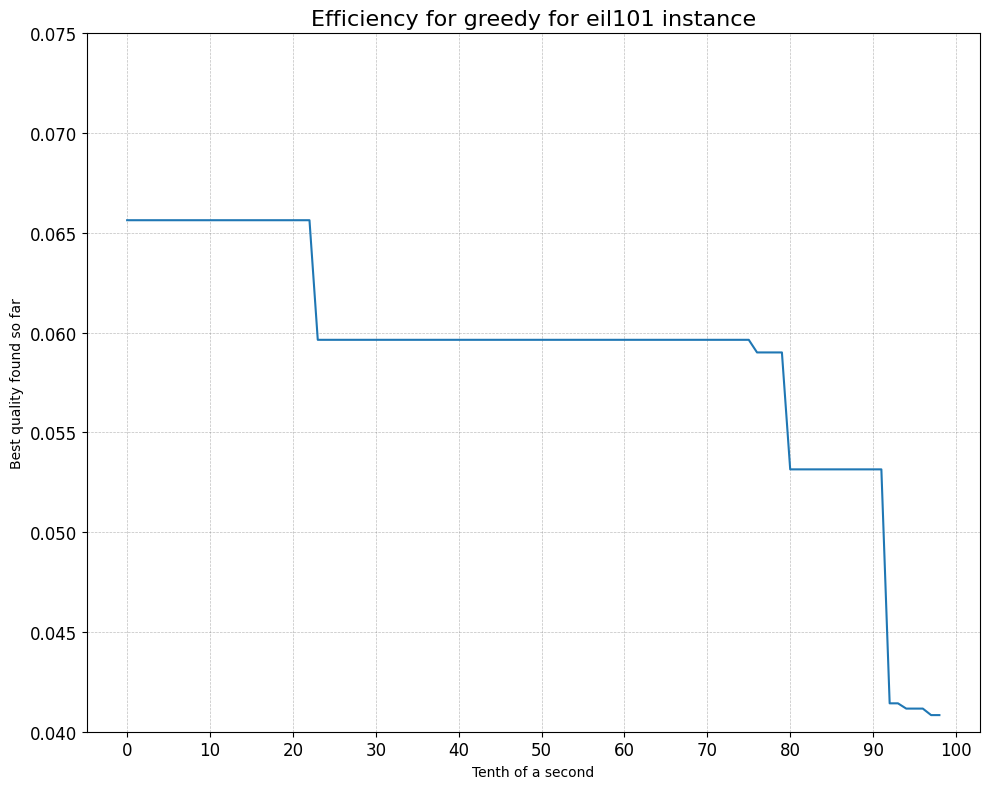

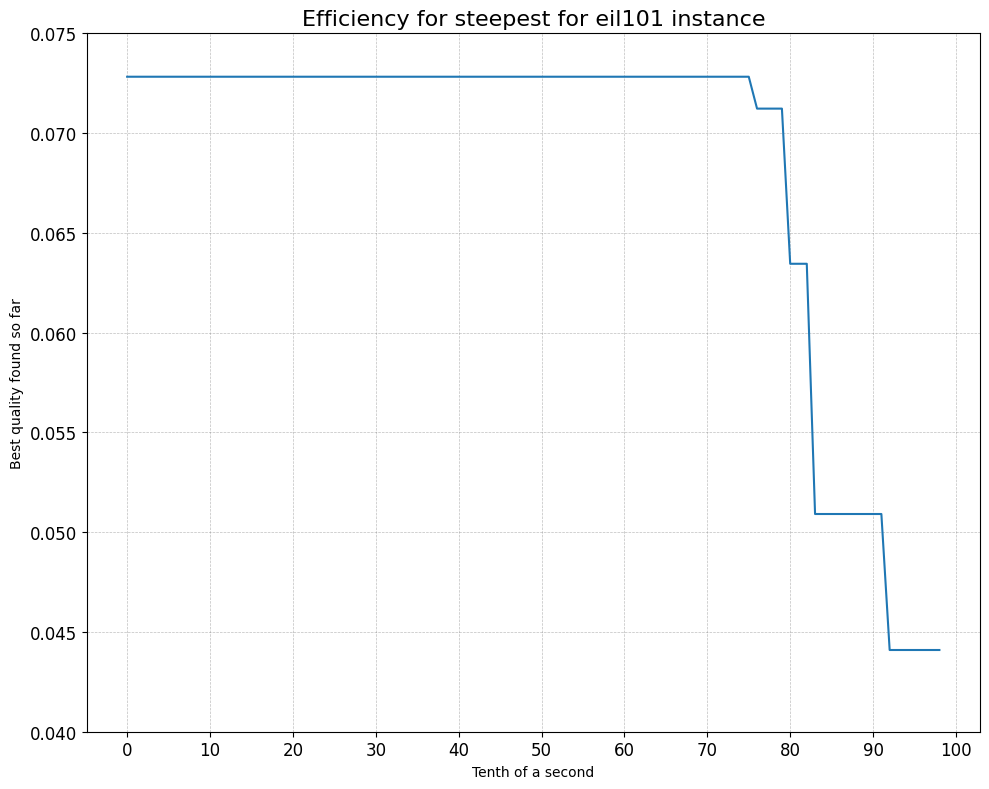

In [149]:
# create_plot_efficiency(random_eil101_efficiency_min, 'random for eil101 instance') 
# create_plot_efficiency(random_walk_eil101_efficiency_min, 'random_walk for eil101 instance')
# create_plot_efficiency(nn_eil101_efficiency_min, 'nearest neighbor for eil101 instance')
create_plot_efficiency(greedy_eil101_efficiency_min, 'greedy for eil101 instance')
create_plot_efficiency(steepest_eil101_efficiency_min, 'steepest for eil101 instance')

# create_plot_efficiency(random_pr76_efficiency_min, 'random for pr76 instance') 
# create_plot_efficiency(random_walk_pr76_efficiency_min, 'random walk for pr76 instance')
# create_plot_efficiency(nn_pr76_efficiency_min, 'nearest neighbor for pr76 instance')
# #create_plot_efficiency(greedy_pr76_efficiency_min, 'greedy for eil101 instance')
# create_plot_efficiency(steepest_pr76_efficiency_min, 'steepest for pr76 instance')

#### Average number of steps (greedy, steepest)

In [53]:
def read_steps_number(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        return [float(line.strip()) for line in lines]

In [54]:
greedy_steps_ch130 = read_steps_number('greedy_iterations_ch130.txt')
greedy_steps_ch150 = read_steps_number('greedy_iterations_ch150.txt')
greedy_steps_eil101 = read_steps_number('greedy_iterations_eil101.txt')
greedy_steps_kroA100 = read_steps_number('greedy_iterations_kroA100.txt')
greedy_steps_kroC100 = read_steps_number('greedy_iterations_kroC100.txt')
greedy_steps_kroD100 = read_steps_number('greedy_iterations_kroD100.txt')
greedy_steps_lin105 = read_steps_number('greedy_iterations_lin105.txt')
greedy_steps_pr76 = read_steps_number('greedy_iterations_pr76.txt')

steepest_steps_ch130 = read_steps_number('steepest_iterations_ch130.txt')
steepest_steps_ch150 = read_steps_number('steepest_iterations_ch150.txt')
steepest_steps_eil101 = read_steps_number('steepest_iterations_eil101.txt')
steepest_steps_kroA100 = read_steps_number('steepest_iterations_kroA100.txt')
steepest_steps_kroC100 = read_steps_number('steepest_iterations_kroC100.txt')
steepest_steps_kroD100 = read_steps_number('steepest_iterations_kroD100.txt')
steepest_steps_lin105 = read_steps_number('steepest_iterations_lin105.txt')
steepest_steps_pr76 = read_steps_number('steepest_iterations_pr76.txt')

In [57]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
def create_boxplot_steps_number(data, algorithm, xlabel='Instances', ylabel='Number of steps', title="Number of steps for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    stats = {}
    for name, values in zip(labels, data):
        stats[name] = {
            'min': np.min(values),
            'max': np.max(values),
            'avg': np.mean(values),
            'std': np.std(values),
        }

    # plot results
    names = labels
    min_values = [stats[name]['min'] for name in names]
    max_values = [stats[name]['max'] for name in names]
    avg_values = [stats[name]['avg'] for name in names]
    std_values = [stats[name]['std'] for name in names]

    fig, ax = plt.subplots()
    # set axis label size
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # set axis tick size
    ax.tick_params(axis='both', which='major', labelsize=12)
    # set y axis range
    ax.set_ylim([0, 3000000])
    # set grid
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    fig.suptitle(title+" "+algorithm, fontsize=16)
    fig.suptitle(title+" "+algorithm)
    fig.axes[0].set_xlabel(xlabel)
    fig.axes[0].set_ylabel(ylabel)
    ax.ticklabel_format(style='plain', axis='y')
    # plot min and max values
    ax.plot(names, min_values, 'o', label='min')
    ax.plot(names, max_values, 'o', label='max')
    # plot avg and std values in a form of error bars
    ax.errorbar(names, avg_values, yerr=std_values, capsize=4, fmt='o', label='avg +- std', elinewidth=2, capthick=1.5)
    ax.legend()
    fig.savefig(algorithm+'_steps_number.pdf', bbox_inches='tight')
    plt.xticks(rotation=90)
    plt.show()

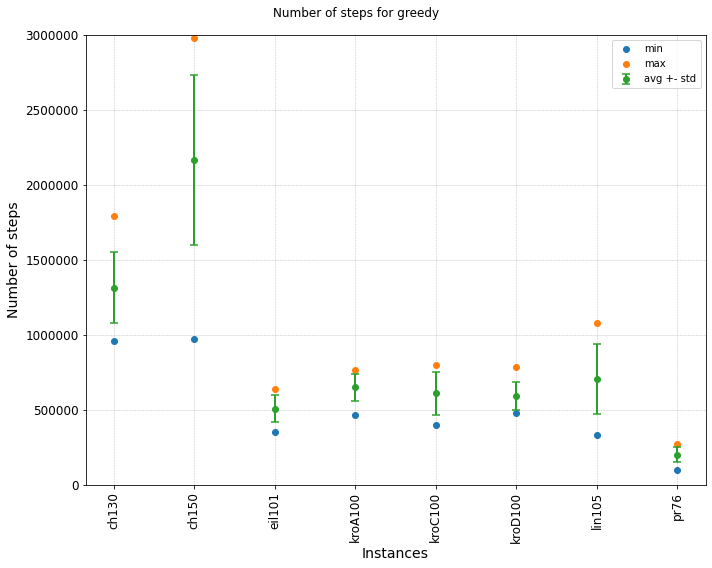

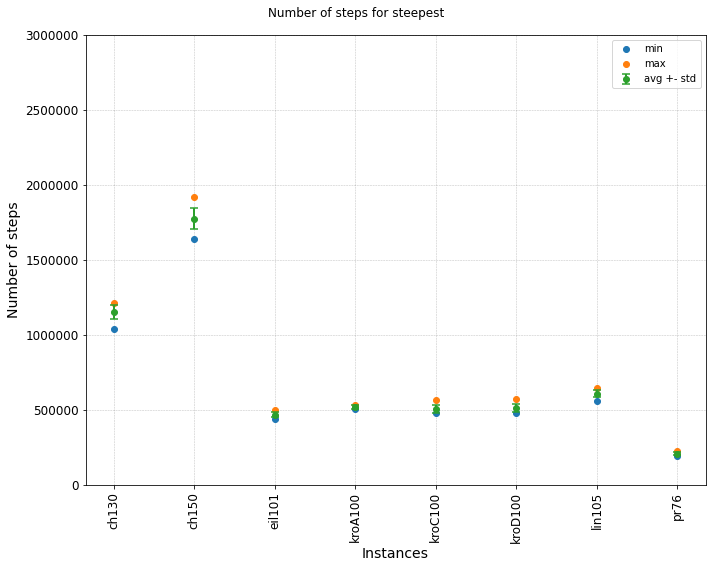

In [58]:
greedy_steps = [greedy_steps_ch130, greedy_steps_ch150, greedy_steps_eil101, greedy_steps_kroA100, greedy_steps_kroC100, greedy_steps_kroD100, greedy_steps_lin105, greedy_steps_pr76]
steepest_steps = [steepest_steps_ch130, steepest_steps_ch150, steepest_steps_eil101, steepest_steps_kroA100, steepest_steps_kroC100, steepest_steps_kroD100, steepest_steps_lin105, steepest_steps_pr76]

create_boxplot_steps_number(greedy_steps, 'greedy')
create_boxplot_steps_number(steepest_steps, 'steepest')

#### Average number of evaluated solutions (random, random walk, greedy, steepest)

In [59]:
def read_visited_solutions(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        return [float(line.strip()) for line in lines]

In [60]:
random_visited_solutions_ch130 = read_visited_solutions('random_visited_solutions_ch130.txt')
random_visited_solutions_ch150 = read_visited_solutions('random_visited_solutions_ch150.txt')
random_visited_solutions_eil101 = read_visited_solutions('random_visited_solutions_eil101.txt')
random_visited_solutions_kroA100 = read_visited_solutions('random_visited_solutions_kroA100.txt')
random_visited_solutions_kroC100 = read_visited_solutions('random_visited_solutions_kroC100.txt')
random_visited_solutions_kroD100 = read_visited_solutions('random_visited_solutions_kroD100.txt')
random_visited_solutions_lin105 = read_visited_solutions('random_visited_solutions_lin105.txt')
random_visited_solutions_pr76 = read_visited_solutions('random_visited_solutions_pr76.txt')

random_walk_visited_solutions_ch130 = read_visited_solutions('random_walk_visited_solutions_ch130.txt')
random_walk_visited_solutions_ch150 = read_visited_solutions('random_walk_visited_solutions_ch150.txt')
random_walk_visited_solutions_eil101 = read_visited_solutions('random_walk_visited_solutions_eil101.txt')
random_walk_visited_solutions_kroA100 = read_visited_solutions('random_walk_visited_solutions_kroA100.txt')
random_walk_visited_solutions_kroC100 = read_visited_solutions('random_walk_visited_solutions_kroC100.txt')
random_walk_visited_solutions_kroD100 = read_visited_solutions('random_walk_visited_solutions_kroD100.txt')
random_walk_visited_solutions_lin105 = read_visited_solutions('random_walk_visited_solutions_lin105.txt')
random_walk_visited_solutions_pr76 = read_visited_solutions('random_walk_visited_solutions_pr76.txt')

greedy_visited_solutions_ch130 = read_visited_solutions('greedy_visited_solutions_ch130.txt')
greedy_visited_solutions_ch150 = read_visited_solutions('greedy_visited_solutions_ch150.txt')
greedy_visited_solutions_eil101 = read_visited_solutions('greedy_visited_solutions_eil101.txt')
greedy_visited_solutions_kroA100 = read_visited_solutions('greedy_visited_solutions_kroA100.txt')
greedy_visited_solutions_kroC100 = read_visited_solutions('greedy_visited_solutions_kroC100.txt')
greedy_visited_solutions_kroD100 = read_visited_solutions('greedy_visited_solutions_kroD100.txt')
greedy_visited_solutions_lin105 = read_visited_solutions('greedy_visited_solutions_lin105.txt')
greedy_visited_solutions_pr76 = read_visited_solutions('greedy_visited_solutions_pr76.txt')

steepest_visited_solutions_ch130 = read_visited_solutions('steepest_visited_solutions_ch130.txt')
steepest_visited_solutions_ch150 = read_visited_solutions('steepest_visited_solutions_ch150.txt')
steepest_visited_solutions_eil101 = read_visited_solutions('steepest_visited_solutions_eil101.txt')
steepest_visited_solutions_kroA100 = read_visited_solutions('steepest_visited_solutions_kroA100.txt')
steepest_visited_solutions_kroC100 = read_visited_solutions('steepest_visited_solutions_kroC100.txt')
steepest_visited_solutions_kroD100 = read_visited_solutions('steepest_visited_solutions_kroD100.txt')
steepest_visited_solutions_lin105 = read_visited_solutions('steepest_visited_solutions_lin105.txt')
steepest_visited_solutions_pr76 = read_visited_solutions('steepest_visited_solutions_pr76.txt')

In [84]:
def create_boxplot_visited_solutions(data, algorithm, xlabel='Instances', ylabel='Number of visited solutions', title="Number of visited solutions for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    stats = {}
    for name, values in zip(labels, data):
        stats[name] = {
            'min': np.min(values),
            'max': np.max(values),
            'avg': np.mean(values),
            'std': np.std(values),
        }

    # plot results
    names = labels
    min_values = [stats[name]['min'] for name in names]
    max_values = [stats[name]['max'] for name in names]
    avg_values = [stats[name]['avg'] for name in names]
    std_values = [stats[name]['std'] for name in names]

    fig, ax = plt.subplots()
    # set axis label size
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # set axis tick size
    ax.tick_params(axis='both', which='major', labelsize=12)
    # set min and max value on y axis
    ax.set_ylim([0, 180])
    # set grid
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    fig.suptitle(title+" "+algorithm, fontsize=16)
    fig.suptitle(title+" "+algorithm)
    fig.axes[0].set_xlabel(xlabel)
    fig.axes[0].set_ylabel(ylabel)
    ax.ticklabel_format(style='plain', axis='y')
    # plot min and max values
    ax.plot(names, min_values, 'o', label='min')
    ax.plot(names, max_values, 'o', label='max')
    # plot avg and std values in a form of error bars
    ax.errorbar(names, avg_values, yerr=std_values, capsize=4, fmt='o', label='avg +- std', elinewidth=2, capthick=1.5)
    ax.legend()
    fig.savefig(algorithm+'_visited_solutions.pdf', bbox_inches='tight')
    plt.xticks(rotation=90)
    plt.show()

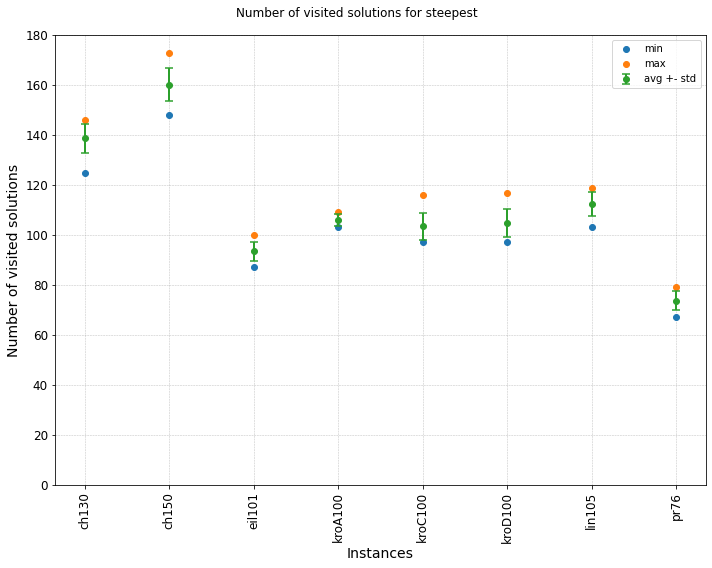

In [85]:
random_visited_solutions = [random_visited_solutions_ch130, random_visited_solutions_ch150, random_visited_solutions_eil101, random_visited_solutions_kroA100, random_visited_solutions_kroC100, random_visited_solutions_kroD100, random_visited_solutions_lin105, random_visited_solutions_pr76]
random_walk_visited_solutions = [random_walk_visited_solutions_ch130, random_walk_visited_solutions_ch150, random_walk_visited_solutions_eil101, random_walk_visited_solutions_kroA100, random_walk_visited_solutions_kroC100, random_walk_visited_solutions_kroD100, random_walk_visited_solutions_lin105, random_walk_visited_solutions_pr76]
greedy_visited_solutions = [greedy_visited_solutions_ch130, greedy_visited_solutions_ch150, greedy_visited_solutions_eil101, greedy_visited_solutions_kroA100, greedy_visited_solutions_kroC100, greedy_visited_solutions_kroD100, greedy_visited_solutions_lin105, greedy_visited_solutions_pr76]
steepest_visited_solutions = [steepest_visited_solutions_ch130, steepest_visited_solutions_ch150, steepest_visited_solutions_eil101, steepest_visited_solutions_kroA100, steepest_visited_solutions_kroC100, steepest_visited_solutions_kroD100, steepest_visited_solutions_lin105, steepest_visited_solutions_pr76]

#create_boxplot_visited_solutions(random_visited_solutions, 'random')
#create_boxplot_visited_solutions(random_walk_visited_solutions, 'random_walk')
#create_boxplot_visited_solutions(greedy_visited_solutions, 'greedy')
create_boxplot_visited_solutions(steepest_visited_solutions, 'steepest')

---

#### Initial vs final quality (greedy, steepest)

In [86]:
def read_initial_final(fileName):
    with open(fileName) as f:
        lines = f.readlines()
        initial = []
        final = []
        i = 0
        for line in lines:
            if i%2 == 0:
                initial.append(float(line))
            else:
                final.append(float(line))
            i += 1
    return initial, final

In [87]:
greedy_initial_eil101, greedy_final_eil101 = read_initial_final('greedy_initial_final_eil101.txt')
greedy_initial_lin105, greedy_final_lin105 = read_initial_final('greedy_initial_final_lin105.txt')
greedy_initial_pr76, greedy_final_pr76 = read_initial_final('greedy_initial_final_pr76.txt')

steepest_initial_eil101, steepest_final_eil101 = read_initial_final('steepest_initial_final_eil101.txt')
steepest_initial_lin105, steepest_final_lin105 = read_initial_final('steepest_initial_final_lin105.txt')
steepest_initial_pr76, steepest_final_pr76 = read_initial_final('steepest_initial_final_pr76.txt')

In [106]:
from numpy.polynomial.polynomial import polyfit

def create_scatter_plot_initial_final(data, algorithm, xlabel='Initial costs', ylabel='Final costs', title="Initial vs final costs for"):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    # title size
    plt.rcParams['axes.titlesize'] = 16
    plt.title(title+" "+algorithm)
    # label size
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set y axis and x axis limits
    plt.ylim(105000, 125000)
    plt.xlim(500000, 650000)
    # set grid
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    x = np.array(data[0])
    y = np.array(data[1])
    b, m = polyfit(x, y, 1)
    plt.plot(x, y, '.')
    plt.plot(x, b + m * x, '-', alpha=0.5)
    plt.savefig(algorithm.split()[0] + '_' + algorithm.split()[-2] + '_initial_final.pdf', bbox_inches='tight')
    plt.show()

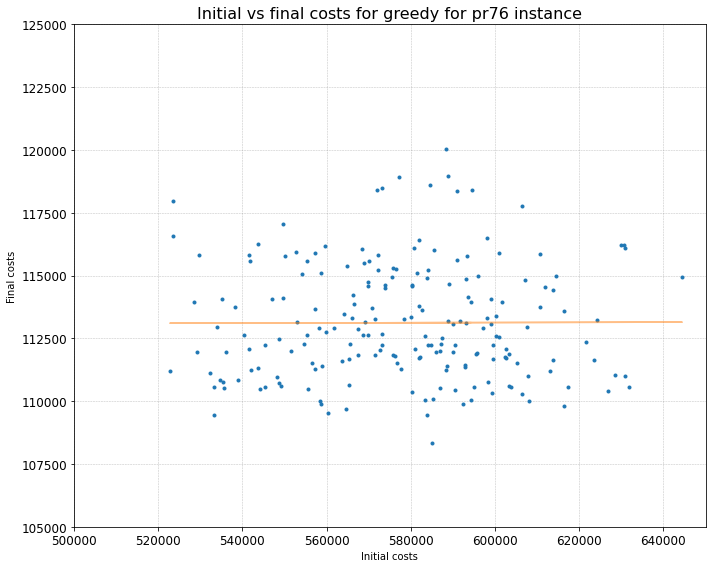

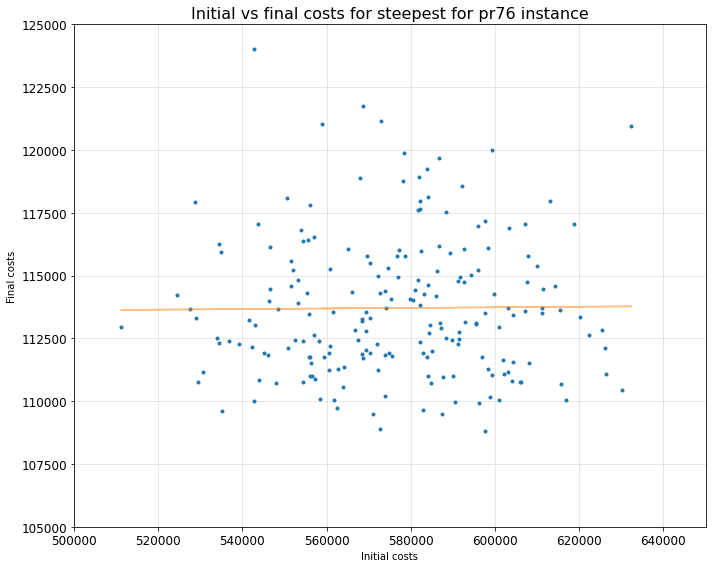

In [107]:
#create_scatter_plot_initial_final([greedy_initial_eil101, greedy_final_eil101], 'greedy for eil101 instance')
#create_scatter_plot_initial_final([greedy_initial_lin105, greedy_final_lin105], 'greedy for lin105 instance')
create_scatter_plot_initial_final([greedy_initial_pr76, greedy_final_pr76], 'greedy for pr76 instance')

#create_scatter_plot_initial_final([steepest_initial_eil101, steepest_final_eil101], 'steepest for eil101 instance')
#create_scatter_plot_initial_final([steepest_initial_lin105, steepest_final_lin105], 'steepest for lin105 instance')
create_scatter_plot_initial_final([steepest_initial_pr76, steepest_final_pr76], 'steepest for pr76 instance')

#### Number of restarts vs average and best solution

In [32]:
def read_restarts(fileName):
    with open(fileName) as f:
        lines = f.readlines()
        restarts = []
        for line in lines:
            restarts.append(float(line))
        # get average for each 10 restarts
        avg_restarts = []
        min_restarts = []
        for i in range(0, len(restarts), 10):
            avg_restarts.append(np.mean(restarts[i:i+10]))
            min_restarts.append(np.min(restarts[i:i+10]))
    return [avg_restarts, min_restarts]

In [33]:
greedy_restarts_ch130 = read_restarts('greedy_3000_ch130.txt')
greedy_restarts_ch150 = read_restarts('greedy_3000_ch150.txt')
greedy_restarts_eil101 = read_restarts('greedy_3000_eil101.txt')
greedy_restarts_eil101_min = [min(greedy_restarts_eil101[1][:i+1]) for i in range(len(greedy_restarts_eil101[1])-1)]
greedy_restarts_eil101_avg = [np.mean(greedy_restarts_eil101[0][:i+1]) for i in range(len(greedy_restarts_eil101[0])-1)]

greedy_restarts_kroA100 = read_restarts('greedy_3000_kroA100.txt')
greedy_restarts_kroC100 = read_restarts('greedy_3000_kroC100.txt')
greedy_restarts_kroD100 = read_restarts('greedy_3000_kroD100.txt')
greedy_restarts_lin105 = read_restarts('greedy_3000_lin105.txt')
greedy_restarts_lin105_min = [min(greedy_restarts_lin105[1][:i+1]) for i in range(len(greedy_restarts_lin105[1])-1)]
greedy_restarts_lin105_avg = [np.mean(greedy_restarts_lin105[0][:i+1]) for i in range(len(greedy_restarts_lin105[0])-1)]

greedy_restarts_pr76 = read_restarts('greedy_3000_pr76.txt')
greedy_restarts_pr76_min = [min(greedy_restarts_pr76[1][:i+1]) for i in range(len(greedy_restarts_pr76[1])-1)]
greedy_restarts_pr76_avg = [np.mean(greedy_restarts_pr76[0][:i+1]) for i in range(len(greedy_restarts_pr76[0])-1)]

steepest_restarts_ch130 = read_restarts('steepest_3000_ch130.txt')
steepest_restarts_ch150 = read_restarts('steepest_3000_ch150.txt')
steepest_restarts_eil101 = read_restarts('steepest_3000_eil101.txt')
steepest_restarts_eil101_min = [min(steepest_restarts_eil101[1][:i+1]) for i in range(len(steepest_restarts_eil101[1])-1)]
steepest_restarts_eil101_avg = [np.mean(steepest_restarts_eil101[0][:i+1]) for i in range(len(steepest_restarts_eil101[0])-1)]

steepest_restarts_kroA100 = read_restarts('steepest_3000_kroA100.txt')
steepest_restarts_kroC100 = read_restarts('steepest_3000_kroC100.txt')
steepest_restarts_kroD100 = read_restarts('steepest_3000_kroD100.txt')
steepest_restarts_lin105 = read_restarts('steepest_3000_lin105.txt')
steepest_restarts_lin105_min = [min(steepest_restarts_lin105[1][:i+1]) for i in range(len(steepest_restarts_lin105[1])-1)]
steepest_restarts_lin105_avg = [np.mean(steepest_restarts_lin105[0][:i+1]) for i in range(len(steepest_restarts_lin105[0])-1)]

steepest_restarts_pr76 = read_restarts('steepest_3000_pr76.txt')
steepest_restarts_pr76_min = [min(steepest_restarts_pr76[1][:i+1]) for i in range(len(steepest_restarts_pr76[1])-1)]
steepest_restarts_pr76_avg = [np.mean(steepest_restarts_pr76[0][:i+1]) for i in range(len(steepest_restarts_pr76[0])-1)]

In [60]:
def create_scatter_plot_restart_vs_score(data, algorithm, xlabel='Number of restarts', ylabel='Cost', title="Number of restarts vs best cost found for"):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    # title size
    plt.rcParams['axes.titlesize'] = 16
    plt.title(title+" "+algorithm)
    # labels size
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set y-axis limits
    plt.ylim(108000, 116000)
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    x = np.arange(1, len(data[0])+1)
    y = np.array(data[0])
    average_y = data[1]
    plt.plot(x, y, 'g.-', label='Minimum from previous restarts')
    plt.plot(x, average_y, 'b.-', label='Average from previous restarts')
    plt.legend()
    # save as pdf
    plt.savefig(algorithm.split()[0] + '_' + algorithm.split()[-2]+'_restarts.pdf', bbox_inches='tight')
    plt.show()

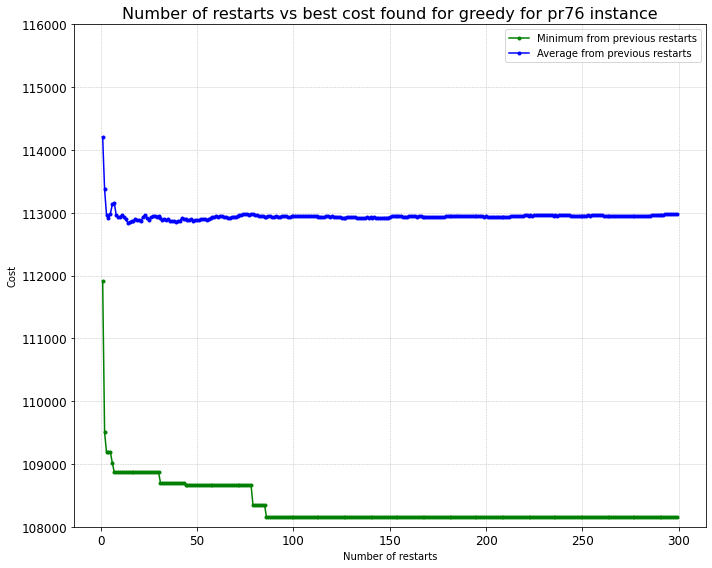

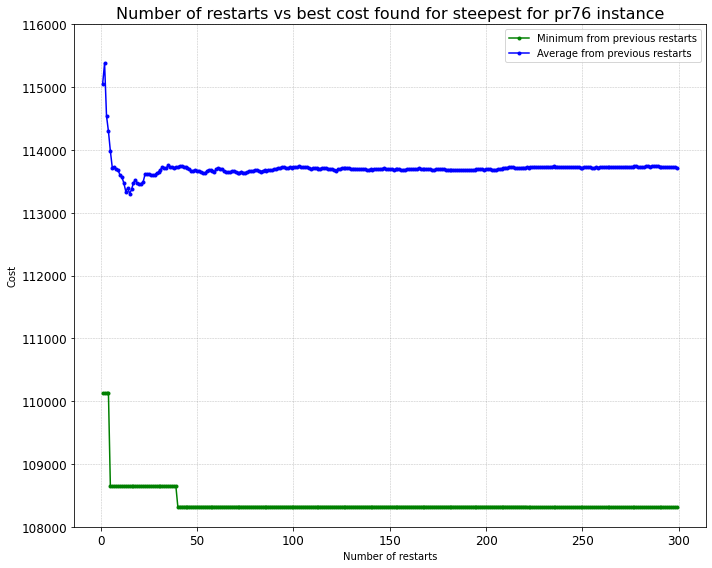

In [61]:
#create_scatter_plot_restart_vs_score([greedy_restarts_eil101_min, greedy_restarts_eil101_avg], 'greedy for eil101 instance')
#create_scatter_plot_restart_vs_score([greedy_restarts_lin105_min, greedy_restarts_lin105_avg], 'greedy for lin105 instance')
create_scatter_plot_restart_vs_score([greedy_restarts_pr76_min, greedy_restarts_pr76_avg], 'greedy for pr76 instance')

#create_scatter_plot_restart_vs_score([steepest_restarts_eil101_min, steepest_restarts_eil101_avg], 'steepest for eil101 instance')
#create_scatter_plot_restart_vs_score([steepest_restarts_lin105_min, steepest_restarts_lin105_avg], 'steepest for lin105 instance')
create_scatter_plot_restart_vs_score([steepest_restarts_pr76_min, steepest_restarts_pr76_avg], 'steepest for pr76 instance')

#### Similarity between solutions

In [14]:
def find_similarity(solution, optimal_solution):
    # get edges from solution
    solution_edges = []
    for i in range(len(solution)-1):
        solution_edges.append((solution[i], solution[i+1]))
    solution_edges.append((solution[-1], solution[0]))
    # add inverse edges
    solution_edges += [(edge[1], edge[0]) for edge in solution_edges]
    # get edges from optimal solution
    optimal_solution_edges = []
    for i in range(len(optimal_solution)-1):
        optimal_solution_edges.append((optimal_solution[i], optimal_solution[i+1]))
    optimal_solution_edges.append((optimal_solution[-1], optimal_solution[0]))
    # calculate how many same edges are in both solutions
    same_edges = 0
    for edge in solution_edges:
        if edge in optimal_solution_edges:
            same_edges += 1
    return same_edges/len(solution)

def find_similarities_between_algorithms(solutions, costs, optimal_solution, optimal_cost):
    # get min cost index for each algorithm
    min_cost_index = np.argmin(costs, axis=0)
    # get optimal solution for each algorithm
    optimal_solutions = [solutions[i][min_cost_index[i]] for i in range(len(solutions))]
    optimal_solutions.append(optimal_solution)
    # find similarities between optimal solutions
    sim_arr = np.zeros((len(optimal_solutions), len(optimal_solutions)))
    for i in range(len(optimal_solutions)):
        for j in range(len(optimal_solutions)):
            sim_arr[i][j] = find_similarity(optimal_solutions[i], optimal_solutions[j])
    return sim_arr
    


Similarities between the best found solutions for each algorithm

/tmp/ipykernel_4902/3962764907.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('similarities_'+instance+'.pdf', bbox_inches='tight')
/home/antoni/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


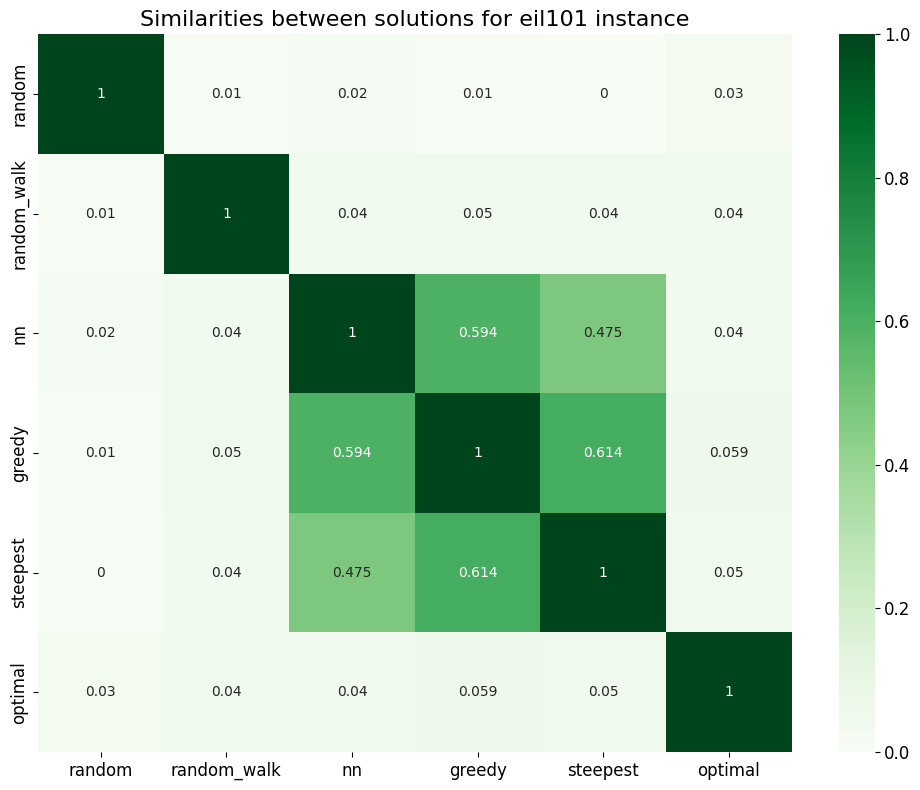

/tmp/ipykernel_4902/3962764907.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('similarities_'+instance+'.pdf', bbox_inches='tight')
/home/antoni/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


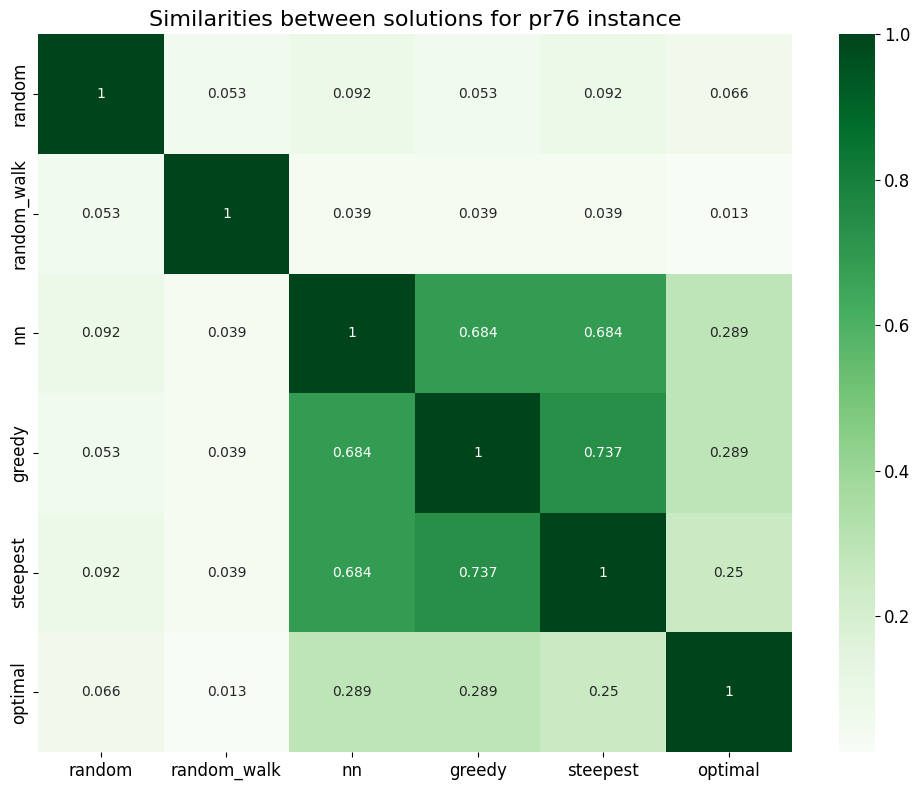

In [16]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, instance):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    ax= plt.subplot()
    # round values
    cm = np.round(cm, 3)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Greens')
    # title size
    plt.rcParams['axes.titlesize'] = 16
    # labels size
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    # labels, title and ticks
    ax.set_title('Similarities between solutions for '+instance+' instance')
    ax.xaxis.set_ticklabels(['random', 'random_walk', 'nn', 'greedy', 'steepest', 'optimal'])
    ax.yaxis.set_ticklabels(['random', 'random_walk', 'nn', 'greedy', 'steepest', 'optimal'])
    # save as pdf
    plt.savefig('similarities_'+instance+'.pdf', bbox_inches='tight')
    plt.show()


# eil101
eil101_solutions = [random_eil101, random_walk_eil101, nn_eil101, greedy_eil101, steepest_eil101]
eil101_costs = [random_eil101_costs, random_walk_eil101_costs, nn_eil101_costs, greedy_eil101_costs, steepest_eil101_costs]
similarities_eil101 = find_similarities_between_algorithms(eil101_solutions, eil101_costs, optimal_solutions['eil101'], optimas['eil101'])
plot_confusion_matrix(similarities_eil101, 'eil101')

print()

# pr76
pr76_solutions = [random_pr76, random_walk_pr76, nn_pr76, greedy_pr76, steepest_pr76]
pr76_costs = [random_pr76_costs, random_walk_pr76_costs, nn_pr76_costs, greedy_pr76_costs, steepest_pr76_costs]
similarities_pr76 = find_similarities_between_algorithms(pr76_solutions, pr76_costs, optimal_solutions['pr76'], optimas['pr76'])
plot_confusion_matrix(similarities_pr76, 'pr76')